<a href="https://colab.research.google.com/github/hayashiyus/First-steps-towards-Deep-Learning/blob/main/09_Linear_algebra.ipynb" target="_parent">
 <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#@title install packages
!pip install mplcyberpunk
!pip install watermark

'\n#@title install packages\n!pip install mplcyberpunk\n!pip install watermark\n'

In [2]:
import mplcyberpunk

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import factorial

In [4]:
import warnings
warnings.simplefilter('ignore')

### **1.　スターリングの公式**

##### **問1：スターリングの公式**
$f(N)=N!$　のときに
$$\begin{aligned}
\log f(N) &\approx N \log N - N
\end{aligned}$$
の右辺で定義される近似公式（スターリングの公式）が成り立つことを数値実験で確認してください．

##### **例1**

Text(0.5, 0, 'N')

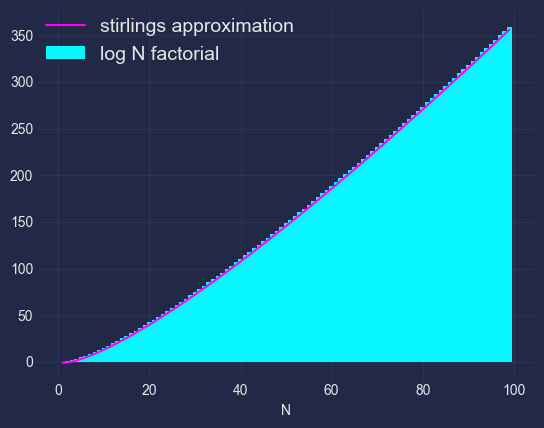

In [23]:
N = np.arange(1, 100)
true_height = np.log(factorial(N))
stirling_height = N * np.log(N) - N

plt.style.use("cyberpunk")
plt.plot(N, stirling_height, color='magenta', label='stirlings approximation')
plt.bar(N, true_height, width=1.0, label='log N factorial')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.xlabel('N')

### **2.　正規分布／ガウス分布**

##### **問2：正規分布／ガウス分布**
正規分布の確率密度関数
$$\begin{aligned}
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2}\right)
\end{aligned}$$
の特別な場合 $\theta=(\mu, \sigma)=(0, 1)$，標準正規分布
$$\begin{aligned}
f(x) = \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{x^2}{2}\right)
\end{aligned}$$
をプロットし，さらに標準正規分布から3000個のサンプルを生成し，ヒストグラムを描いてください

##### **例2**

Text(0, 0.5, '$f(x)$')

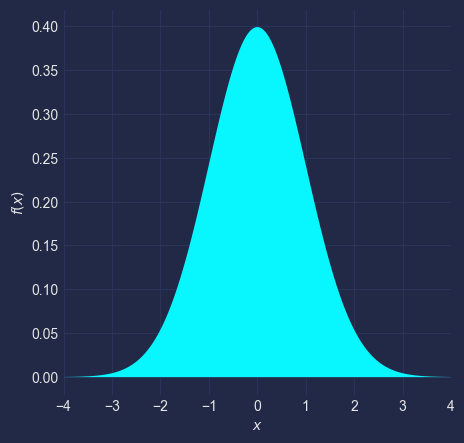

In [85]:
# 入力　x　の系列を3000個作成
x = np.linspace(-4, 4, 3000)
# 入力　x　に対応する確率密度関数　f(x)　の値を作成
dist = stats.norm.pdf(x)

plt.style.use("cyberpunk")
plt.fill_between(x, dist)
plt.xlim(-4, 4)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Text(0.5, 0, '$x$')

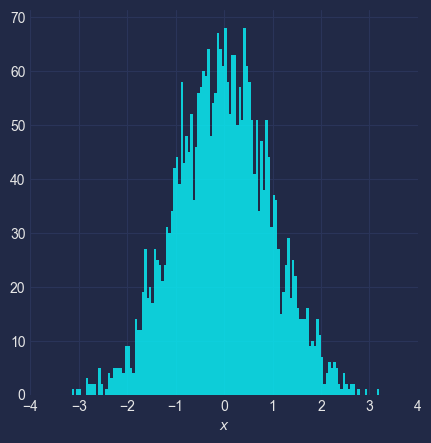

In [86]:
# 標準正規分布からサンプルを3000個生成
sample = stats.norm.rvs(loc=0, scale=1, size=3000, random_state=0)
bins = np.arange(-4, 4, 0.05)

plt.style.use("cyberpunk")
plt.hist(sample, bins, alpha=0.8)
plt.xlim(-4, 4)
plt.xlabel('$x$')

### **3.　最尤法**

##### **問3：最尤法**
ある観測データ $x_{i}$ の確率モデルを
$$\begin{aligned}
q\left(x_{i} \mid \theta\right) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x_{i}-\mu)^2}{2 \sigma^2}\right)
\end{aligned}$$
としたとき，その尤度関数は
$$\begin{aligned}
f\left(\theta \mid x_1, \cdots, x_N\right) &\equiv \prod_{i=1}^N q\left(x_i \mid \theta\right) \\
&= q\left(x_1 \mid \theta\right) q\left(x_2 \mid \theta\right) \cdots q\left(x_N \mid \theta\right)
\end{aligned}$$
対数尤度関数は
$$\begin{aligned}
l_N\left(\theta \mid x_1, \cdots, x_N\right) & \equiv \log f\left(\theta \mid x_1, \cdots, x_N\right) \\
&=\log \prod_{i=1}^N q\left(x_i \mid \theta\right)=\sum_{i=1}^N l\left(\theta \mid x_i\right)
\end{aligned}$$
となる．正規分布から生成される人工データを観測データとみなして，最適なパラメータの推定値を求めてください．また尤度関数，対数尤度関数をプロットしてください．

##### **例3**

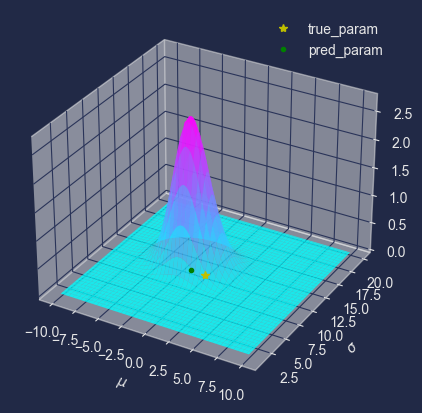

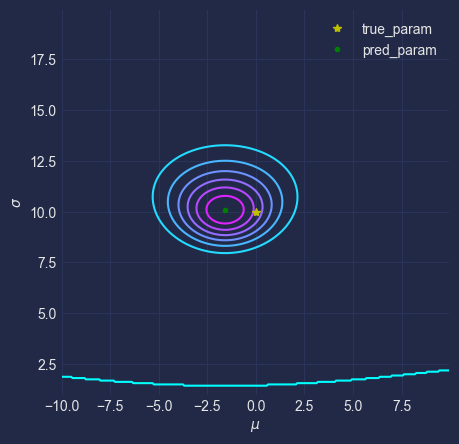

In [91]:
# 尤度関数
def likelihood(mu, sigma, x):
    return stats.norm.pdf(x, loc=mu, scale=sigma).prod()

# μ=0，σ=10 の正規分布を真のモデルに設定し，30個のサンプルを生成
n = 30
mu = 0
sigma = 10
sample = stats.norm.rvs(loc=mu, scale=sigma, size=n)

# 各点の尤度関数の値を計算する。
dx = 0.0625
dy = 0.0625
x = np.arange(-10, 10, dx)
y = np.arange(1, 20, dy)
X, Y = np.meshgrid(x, y)

Z = []
for m, s in zip(X.ravel(), Y.ravel()):
    # 尤度関数を計算
    l = likelihood(mu=m, sigma=s, x=sample)
    Z.append(l)
Z = np.array(Z).reshape(*X.shape)

# 最尤推定量を計算する。
mu_pred, sigma_pred = sample.mean(), sample.std()

plt.rcParams["figure.figsize"] = (5,5)
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap=plt.cm.cool, alpha=0.8)
ax.plot(mu, sigma, 'y*', label='true_param')
ax.plot(mu_pred, sigma_pred, 'g.', label='pred_param')
ax.legend()
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$L$')
plt.show()

plt.rcParams["figure.figsize"] = (5,5)
fig, ax = plt.subplots()
ax.contour(X, Y, Z)
ax.plot(mu, sigma, 'y*', label='true_param')
ax.plot(mu_pred, sigma_pred, 'g.', label='pred_param')
ax.legend()
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
plt.show()

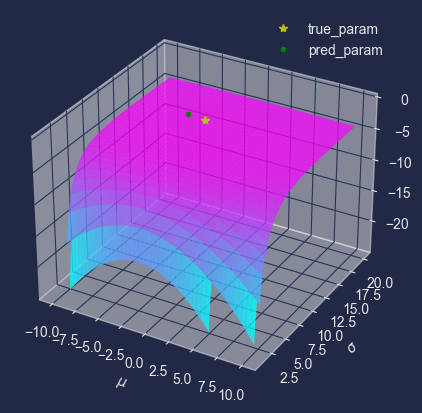

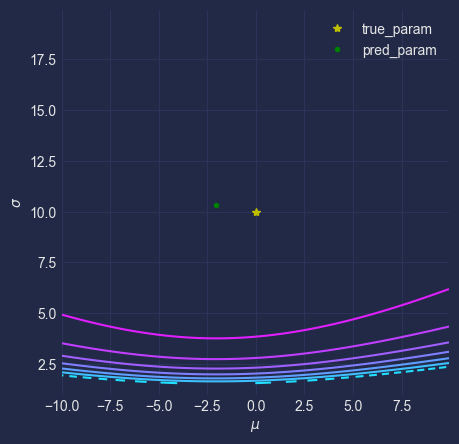

In [90]:
# 対数尤度関数
def log_likelihood(mu, sigma, x):
    return 1/n * np.log(likelihood(mu, sigma, x))

Z = []
for m, s in zip(X.ravel(), Y.ravel()):
    # 対数尤度関数を計算
    l = log_likelihood(mu=m, sigma=s, x=sample)
    Z.append(l)
Z = np.array(Z).reshape(*X.shape)

# 最尤推定量を計算する。
mu_pred, sigma_pred = sample.mean(), sample.std()

plt.rcParams["figure.figsize"] = (5,5)
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap=plt.cm.cool, alpha=0.8)
ax.plot(mu, sigma, 'y*', label='true_param')
ax.plot(mu_pred, sigma_pred, 'g.', label='pred_param')
ax.legend()
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$L$')
plt.show()

plt.rcParams["figure.figsize"] = (5,5)
fig, ax = plt.subplots()
ax.contour(X, Y, Z)
ax.plot(mu, sigma, 'y*', label='true_param')
ax.plot(mu_pred, sigma_pred, 'g.', label='pred_param')
ax.legend()
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
plt.show()

In [92]:
%load_ext watermark
%watermark --iversions

mplcyberpunk: 0.6.0
numpy       : 1.22.1
scipy       : 1.7.3
seaborn     : 0.12.0
pandas      : 1.5.0
matplotlib  : 3.6.0

